In [2]:
import pandas as pd
import numpy as np
from collections import Counter

# from google.colab import drive
# drive.mount("/content/drive")

import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import *


class KNNClassifier:
    k = 1
    train_df = pd.DataFrame()
    test_df = pd.DataFrame()
    best_k = 5

    def check_accuracy(self, predicted_label, validation_label):
        total=0
        correct=0
        accuracy=0.0
        if(len(predicted_label)!=len(validation_label)):
            print("Something's fishy!")
            return
            
        total=len(predicted_label)
        for i in range(total):
            if(predicted_label[i]==validation_label[i]):
                correct+=1
        accuracy=correct/total
        return accuracy
            
    def euclidean_distance(self, x, y):
        return np.linalg.norm(np.array(x)-np.array(y))
    
    def manhattan_distance(self, x, y):
        return np.sum(np.absolute(np.array(x)-np.array(y)))
    
    def knn_algo(self, train_data, test_data, k):
        predicted_label=[]
        for i in range(0, test_data.shape[0]): #test_data
            # print("i:",i)
            distance=[]
            labels=[]            
            for j in range(0, train_data.shape[0]): #train_data
#                 dist = self.euclidean_distance(test_data[i], train_data[j])
                dist = self.manhattan_distance(test_data[i], train_data[j])
                distance.append([dist,label_of_train_data[j][0]])
                
            for j in sorted(distance)[:k]:
                labels.append(j[1])#gives the top k labels for a particular test_df
            predicted_label.append(Counter(labels).most_common(1)[0][0])
        return predicted_label


    def train_validation_split(self, df):
        dataLen=int(0.9*df.shape[0])
        #dataLen=df.shape[0]-100
        return df.iloc[0:dataLen, :], df.iloc[dataLen:,:]


    def predict(self, test_file_name):
        self.test_df = pd.read_csv(test_file_name, header=None)[:]
        return self.knn_algo(self.train_df.values, self.test_df.values, self.k)


    def train(self, train_file_name):
        df = pd.read_csv(train_file_name)[:]

        self.train_df, validation_df = self.train_validation_split(df)

        global label_of_train_data
        label_of_train_data = self.train_df.iloc[:,:1].to_numpy()
        self.train_df = self.train_df.iloc[:,1:]#dropping the label col from train_data

        label_of_validation_data = validation_df.iloc[:, :1].to_numpy()
        validation_df = validation_df.iloc[:,1:]

        global accuracy_k
        accuracy_k=[]
        for i in [1,3,5,7]:
            self.k=i
            predicted_label=self.knn_algo(self.train_df.values, validation_df.values, self.k)       
            acc=self.check_accuracy(predicted_label, label_of_validation_data)
            print("K:",self.k)
            accuracy_k.append([acc, self.k])
        self.k = self.best_k

knn_classifier = KNNClassifier()
knn_classifier.train('./Datasets/q1/train.csv')
predictions = knn_classifier.predict('./Datasets/q1/test.csv')
test_labels = list()
with open("./Datasets/q1/test_labels.csv") as f:
  for line in f:
    test_labels.append(int(line))
# print("Accuracy of custom kNN classifier: ", accuracy_score(test_labels[:10], predictions))
# print("r2_score: ", r2_score(test_labels[:10], predictions))

K: 1
K: 3
K: 5
K: 7


## Accuracy for different k values with Euclidean Distance

Accuracy: [0.9565, 0.9575, 0.955, 0.9565]
K: [1, 3, 5, 7]


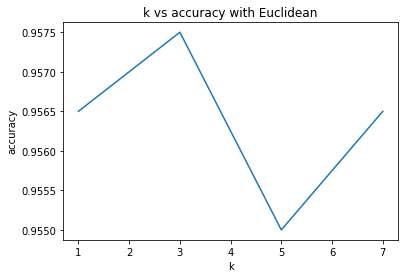

In [7]:
accuracy = [num[0] for num in accuracy_k]
k_vals = [num[1] for num in accuracy_k]
print("Accuracy:",accuracy)
print("K:",k_vals)

plt.plot(k_vals, accuracy) 
  
plt.xlabel('k')
plt.ylabel('accuracy')  
plt.title("k vs accuracy with Euclidean") 
# plt.legend()
plt.show() 

## Accuracy for different k values with Manhattan Distance

Accuracy: [0.9505, 0.952, 0.9495, 0.9485]
K: [1, 3, 5, 7]


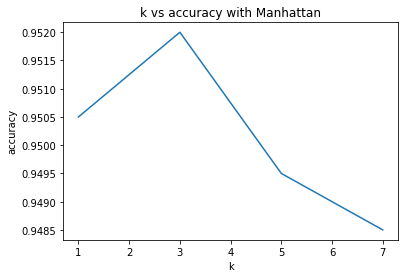

In [3]:
accuracy = [num[0] for num in accuracy_k]
k_vals = [num[1] for num in accuracy_k]
print("Accuracy:",accuracy)
print("K:",k_vals)

plt.plot(k_vals, accuracy) 
  
plt.xlabel('k')
plt.ylabel('accuracy')  
plt.title("k vs accuracy with Manhattan") 
# plt.legend()
plt.show() 

## Reportings for Custom kNN Classifier

### Accuracy Score

In [8]:
accuracy_score(test_labels[:], predictions)

0.962

### Confusion Matrix

In [9]:
confusion_matrix(test_labels[:], predictions)

array([[ 93,   0,   0,   0,   0,   0,   1,   0,   0,   0],
       [  0, 100,   0,   1,   0,   0,   0,   0,   0,   0],
       [  0,   0, 105,   1,   0,   0,   0,   2,   0,   0],
       [  0,   0,   0, 106,   0,   1,   1,   0,   0,   0],
       [  0,   1,   0,   0,  83,   0,   1,   0,   0,   6],
       [  0,   0,   0,   1,   0,  79,   0,   0,   1,   0],
       [  0,   0,   0,   0,   0,   0, 101,   0,   0,   0],
       [  0,   4,   1,   0,   1,   0,   0,  95,   0,   3],
       [  1,   0,   1,   3,   0,   2,   0,   0,  93,   0],
       [  2,   0,   0,   0,   0,   1,   0,   1,   1, 107]])

### f1_score

In [10]:
f1_score(test_labels[:], predictions, average='micro', zero_division=1)

0.962

### Classification Score

In [11]:
print(classification_report(test_labels[:], predictions))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98        94
           1       0.95      0.99      0.97       101
           2       0.98      0.97      0.98       108
           3       0.95      0.98      0.96       108
           4       0.99      0.91      0.95        91
           5       0.95      0.98      0.96        81
           6       0.97      1.00      0.99       101
           7       0.97      0.91      0.94       104
           8       0.98      0.93      0.95       100
           9       0.92      0.96      0.94       112

    accuracy                           0.96      1000
   macro avg       0.96      0.96      0.96      1000
weighted avg       0.96      0.96      0.96      1000



## Reportings for Scikit-learn’s kNN classifier

### Accuracy Score

In [12]:
train_data=knn_classifier.train_df.values
# print(train_data)
test_data=knn_classifier.test_df.values
# print(label_of_train_data)

from sklearn.neighbors import KNeighborsClassifier

neigh = KNeighborsClassifier(n_neighbors=5)
neigh.fit(train_data, label_of_train_data.ravel())

predictions_inbuilt_knn = neigh.predict(test_data)

accuracy_score(test_labels[:], predictions_inbuilt_knn)

0.958

### Confusion matrix

In [13]:
confusion_matrix(test_labels[:], predictions_inbuilt_knn)

array([[ 93,   0,   0,   0,   0,   0,   1,   0,   0,   0],
       [  0, 100,   0,   1,   0,   0,   0,   0,   0,   0],
       [  0,   0, 105,   1,   0,   0,   0,   2,   0,   0],
       [  0,   0,   0, 107,   0,   1,   0,   0,   0,   0],
       [  0,   1,   0,   0,  83,   0,   1,   0,   0,   6],
       [  0,   1,   0,   1,   0,  78,   0,   0,   1,   0],
       [  0,   0,   0,   0,   0,   0, 101,   0,   0,   0],
       [  0,   4,   1,   0,   2,   0,   0,  94,   0,   3],
       [  1,   0,   2,   3,   0,   2,   0,   0,  92,   0],
       [  2,   0,   1,   0,   1,   2,   0,   1,   0, 105]])

### f1_score

In [14]:
f1_score(test_labels[:], predictions, average='micro', zero_division=1)

0.962

### Classification Score

In [15]:
print(classification_report(test_labels[:], predictions))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98        94
           1       0.95      0.99      0.97       101
           2       0.98      0.97      0.98       108
           3       0.95      0.98      0.96       108
           4       0.99      0.91      0.95        91
           5       0.95      0.98      0.96        81
           6       0.97      1.00      0.99       101
           7       0.97      0.91      0.94       104
           8       0.98      0.93      0.95       100
           9       0.92      0.96      0.94       112

    accuracy                           0.96      1000
   macro avg       0.96      0.96      0.96      1000
weighted avg       0.96      0.96      0.96      1000

